# Gaussian Processes - Manual Example

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import shape
import seaborn as sns

## Observed Data

In [31]:
# Observed Data
x = np.array([0, 1, 2, 3, 5])
y = np.array([10, 9, 2, 3, 11])

## Kernel Function

In [32]:
def kernel(x, xprime, l=1):
    return np.exp(
        -(x-xprime)**2
        /2*l**2
    )


## Calculate Kernel Matrix

In [33]:
cov_mtx = np.vstack([kernel(elem, x) for elem in x])

## Some Random Samples

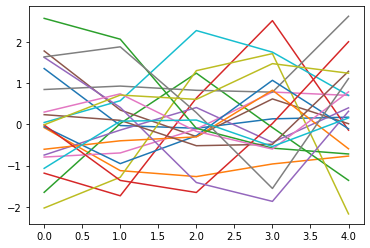

In [34]:
points = np.random.multivariate_normal(np.zeros_like(cov_mtx[0]), cov_mtx, 20)

for i in range(points.shape[0]):
    sns.lineplot(x=range(len(x)), y=points[i])


## Mean & STD for a new sample

In [35]:
def predict_mean_for(x, train_data, K, r):
    # Closed form solution
    return kernel(x, train_data) @ np.linalg.inv(K) @ r

def predict_std_for(x, train_data, K, r):
    # Closed form solution
    return kernel(x, x) - kernel(x, train_data) @ np.linalg.inv(K) @ kernel(x, train_data)


## Calculating for Example x & y values

In [36]:
x_new = 4
mean_new = predict_mean_for(x=x_new, train_data=x, K=cov_mtx, r=y)
std_new = predict_std_for(x=x_new, train_data=x, K=cov_mtx, r=y)
print(mean_new)
print(std_new)


8.390957772776197
0.2663126915814267


Text(0.5, 1.0, 'Sample Points from above + 2 predictions for un-observed x')

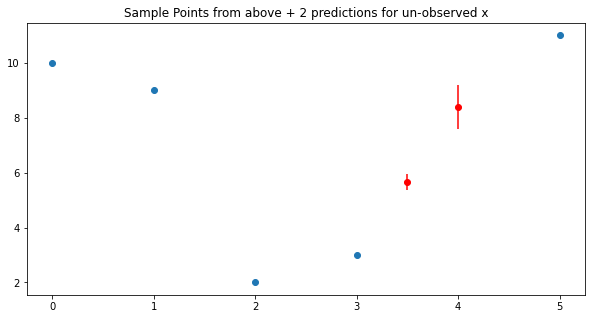

In [37]:
plt.subplots(figsize=(10,5))
plt.scatter(x, y)
plt.errorbar(x=x_new, y=mean_new, yerr=3*std_new, color='red', marker='o')

x_new = 3.5
mean_new = predict_mean_for(x=x_new, train_data=x, K=cov_mtx, r=y)
std_new = predict_std_for(x=x_new, train_data=x, K=cov_mtx, r=y)
plt.errorbar(x=x_new, y=mean_new, yerr=3*std_new, color='red', marker='o')
plt.title("Sample Points from above + 2 predictions for un-observed x")